<h3> step:1] - Import necessary libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


<h3> step:2] - Read the Dataset</h3>

In [36]:
 
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<h3> step:3] - sanity check of data </h3>

In [37]:

#check for missing values as percentages
diabetes.isnull().sum()/ diabetes.shape[0] * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [38]:
diabetes.shape

(768, 9)

In [39]:
#check the columns to ensure consistent data values using a dictionary

{col: len(diabetes[col].unique()) for col in diabetes.columns}

{'Pregnancies': 17,
 'Glucose': 136,
 'BloodPressure': 47,
 'SkinThickness': 51,
 'Insulin': 186,
 'BMI': 248,
 'DiabetesPedigreeFunction': 517,
 'Age': 52,
 'Outcome': 2}

In [42]:
# format Gender column to have uniform values
#count = sum(1 for x in diabetes['Gender'] if x != 'F' and x != 'M')
#print(count)

 # capitalise the counted elements
#diabetes['Gender']= diabetes['Gender'].str.title().str[0]

#convert gender into 1s and 0s
#diabetes['Gender'] = diabetes['Gender'].replace({'M': 1, 'F': 0})

diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3>step:4] - Exploratory Data Analysis (EDA) </h3>


In [43]:
# Descriptive Analysis Numerical
diabetes.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [46]:
# Descriptive Analysis of Object
#diabetes.describe(include='object')

ValueError: No objects to concatenate

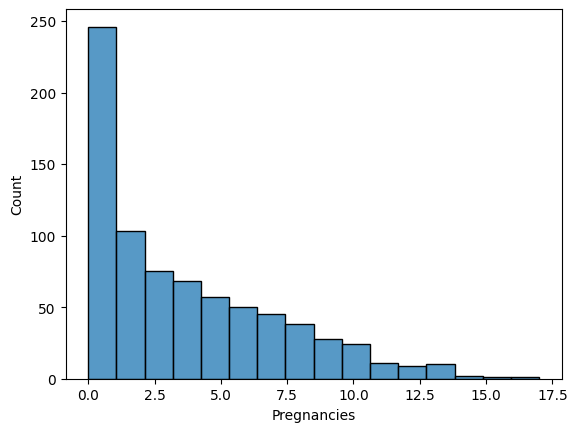

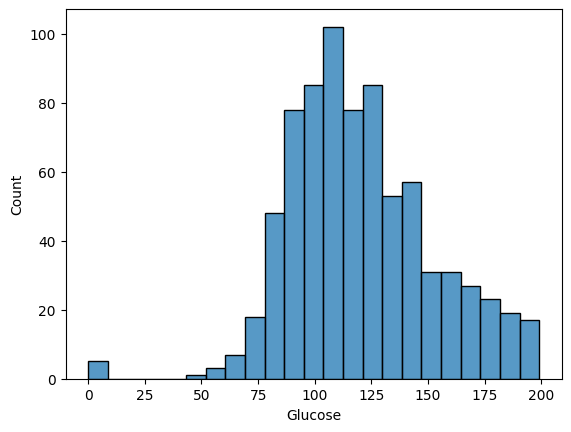

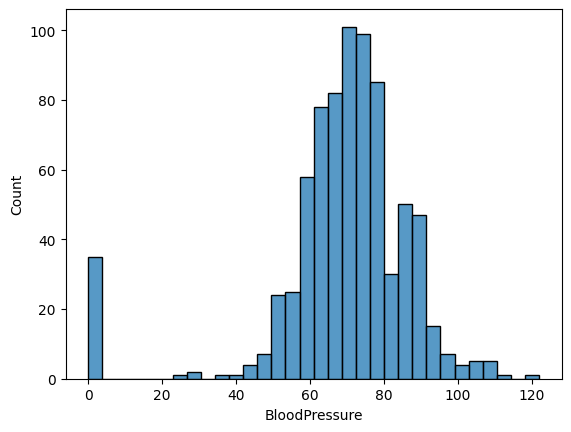

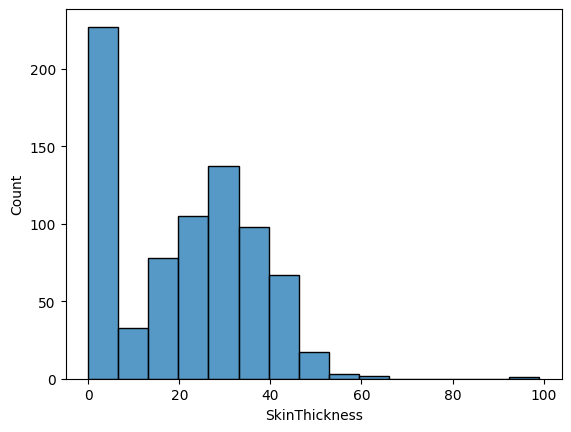

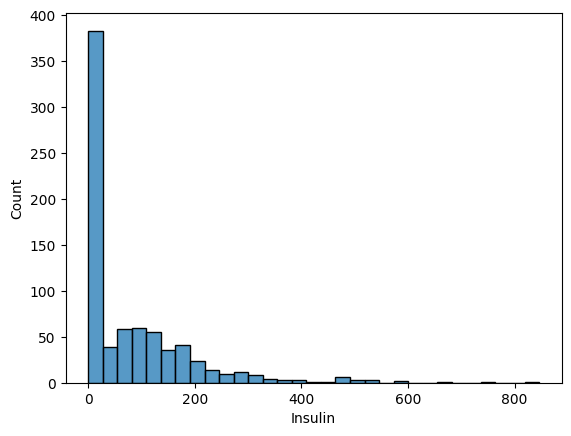

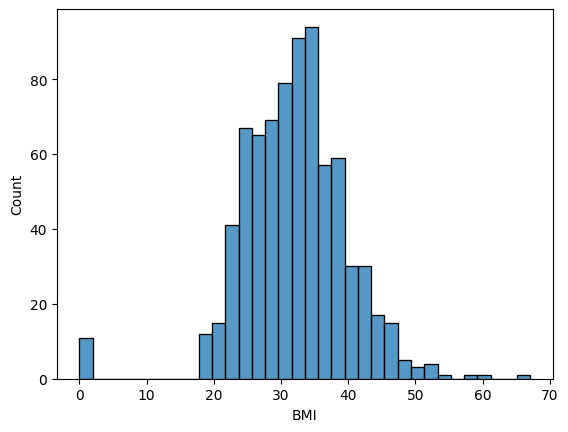

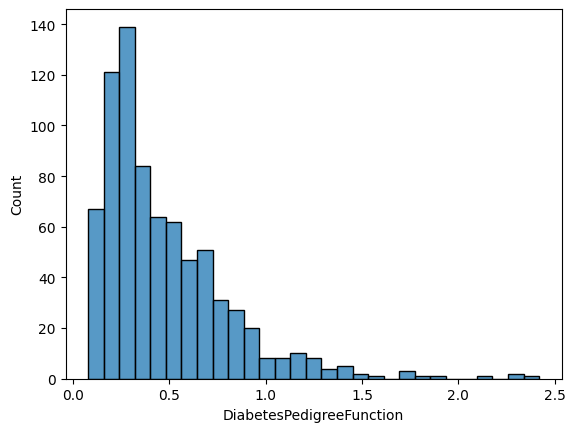

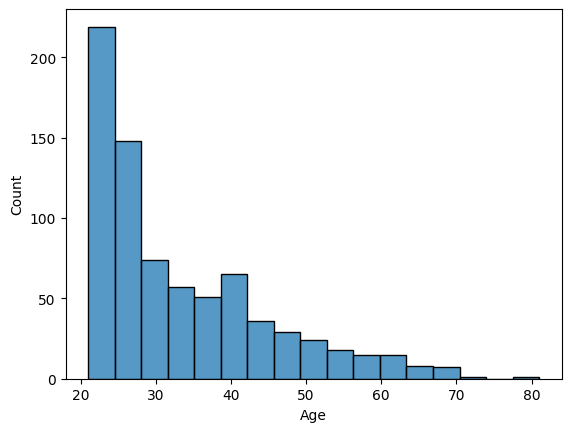

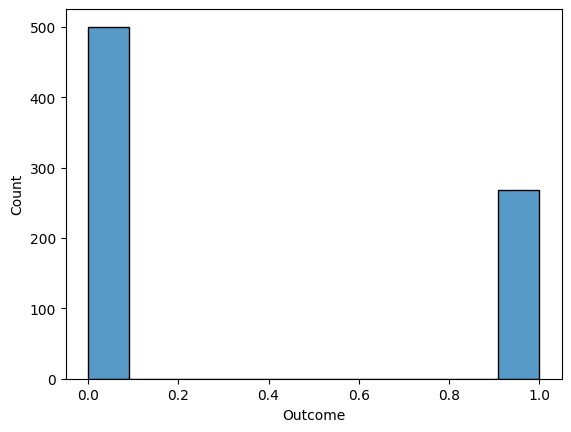

In [44]:
#histogram to understand the distribution
for col in diabetes.select_dtypes(include='number').columns:
    sns.histplot(data=diabetes, x=col)
    plt.show()
    

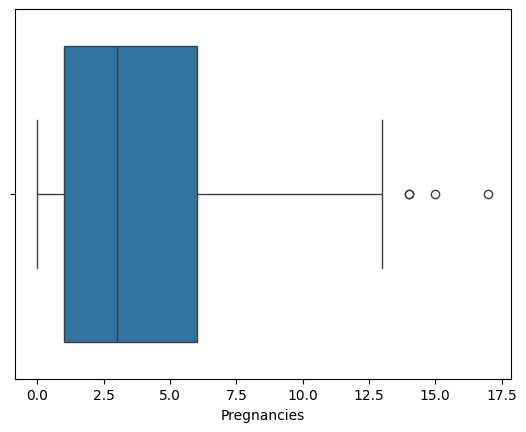

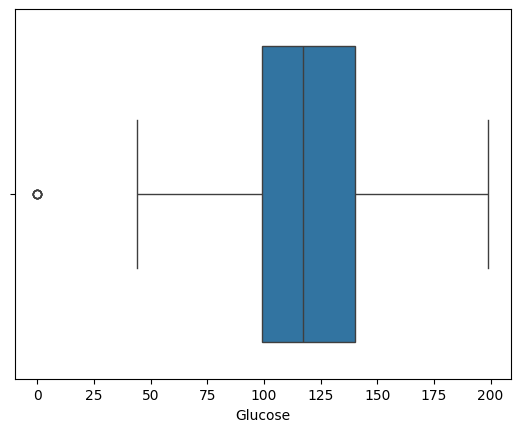

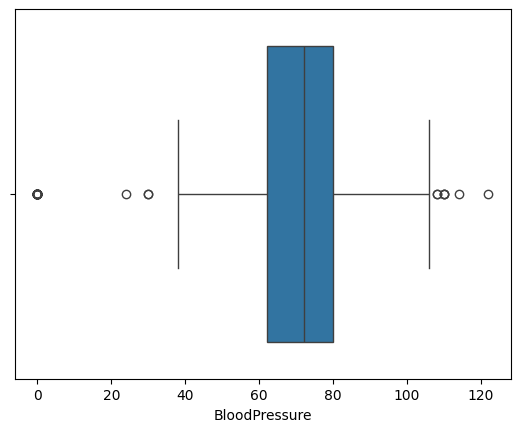

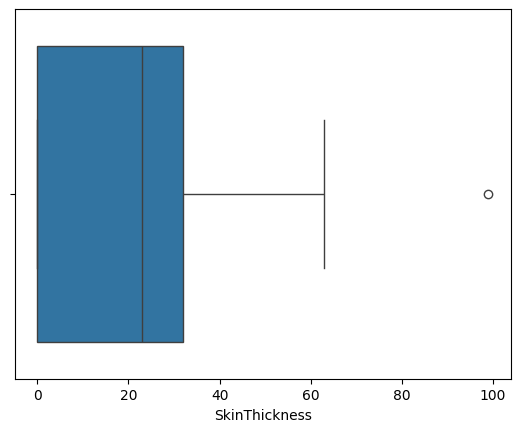

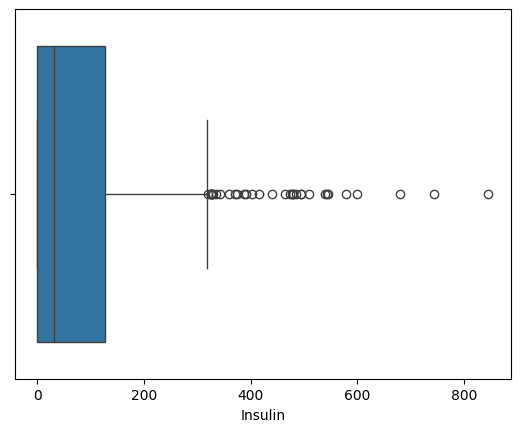

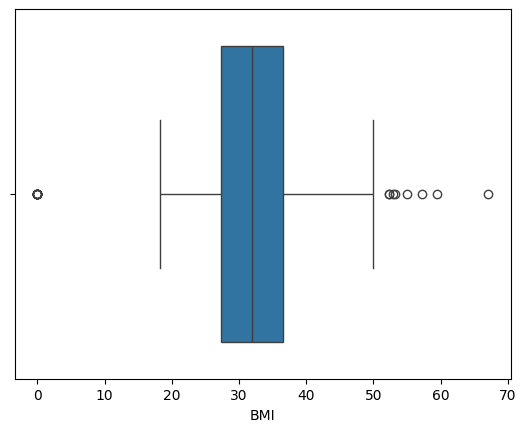

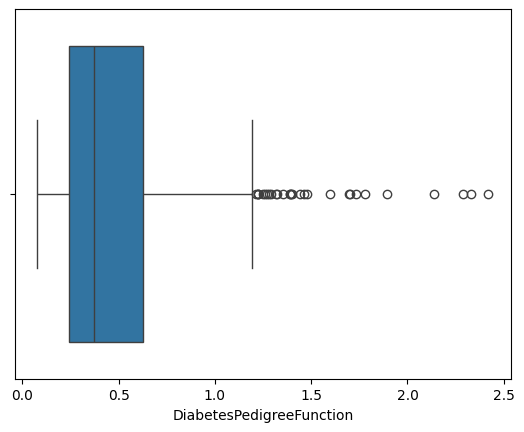

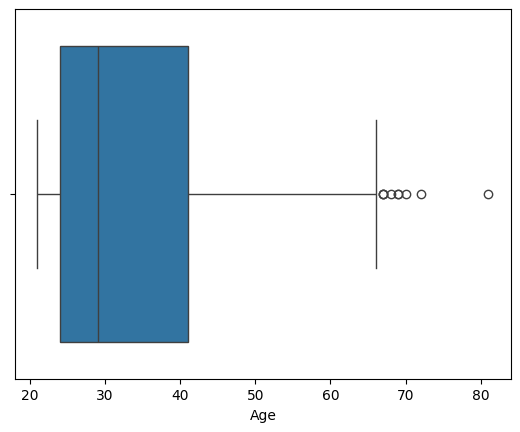

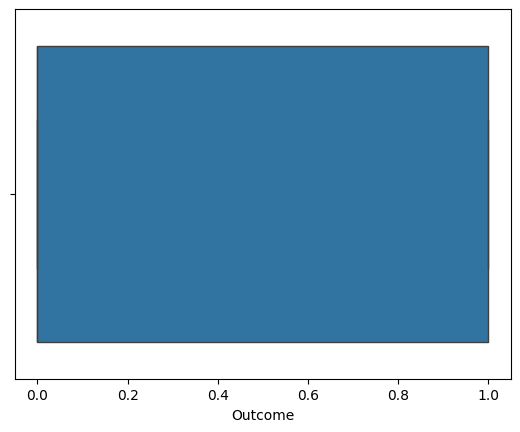

In [45]:
#boxplot to understand outliers

for col in diabetes.select_dtypes(include='number').columns:
    sns.boxplot(data=diabetes, x=col)
    plt.show()

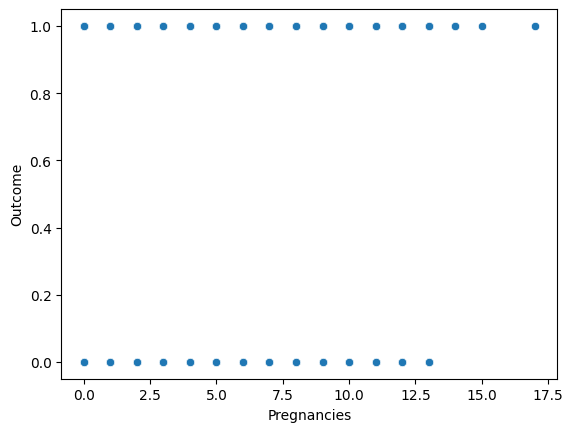

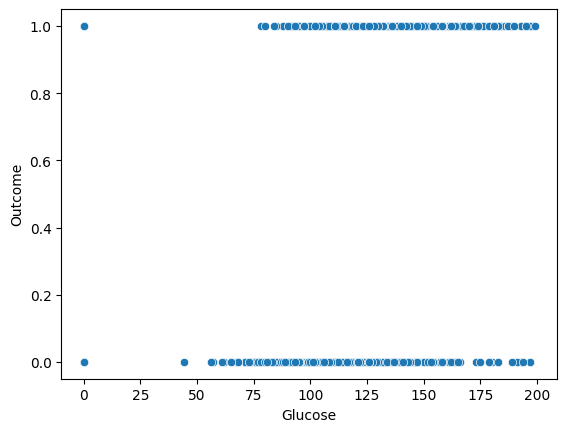

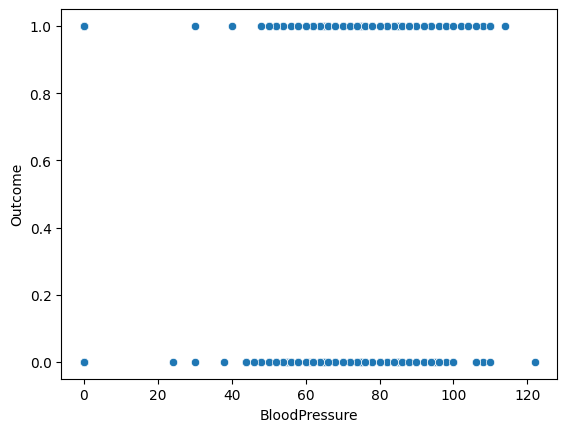

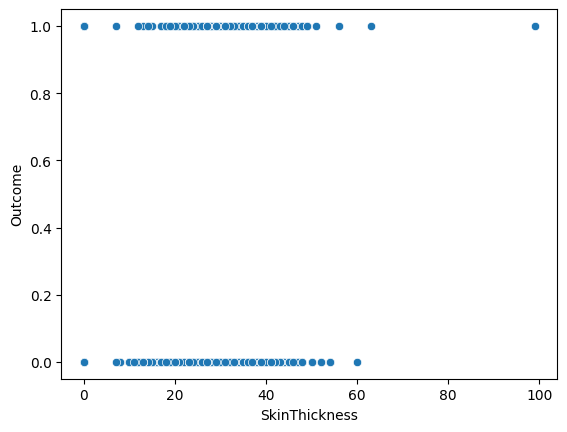

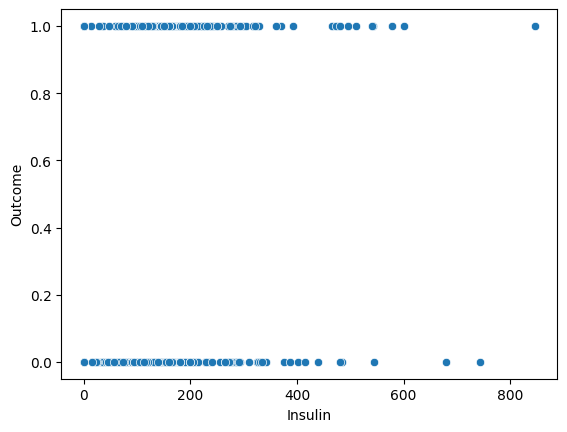

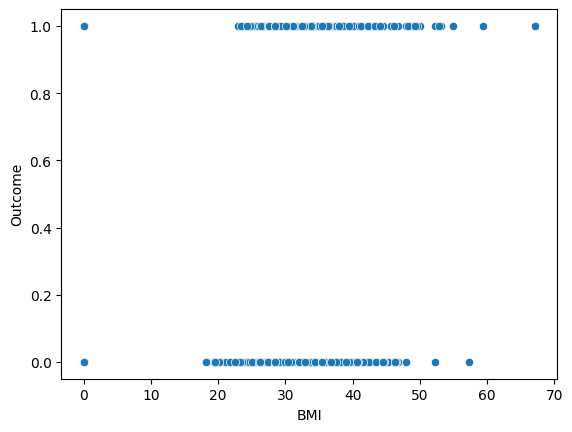

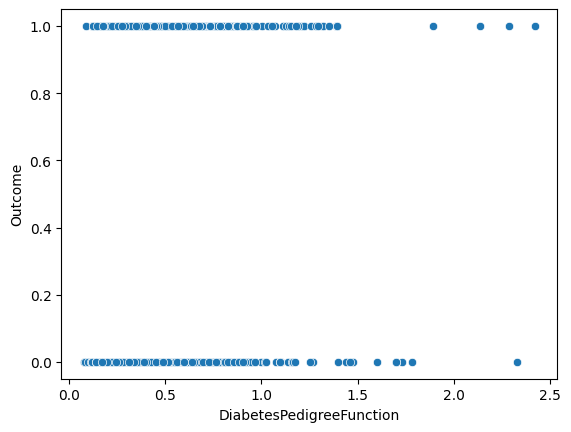

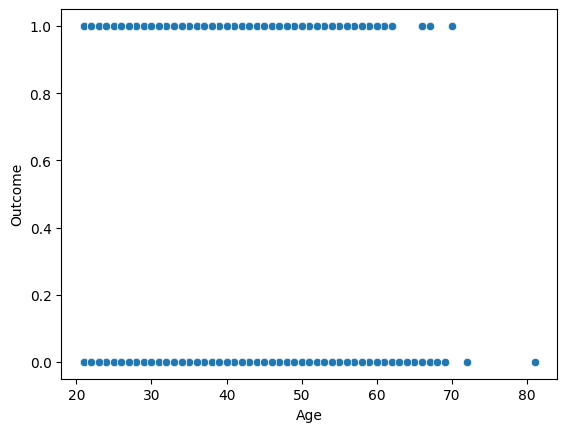

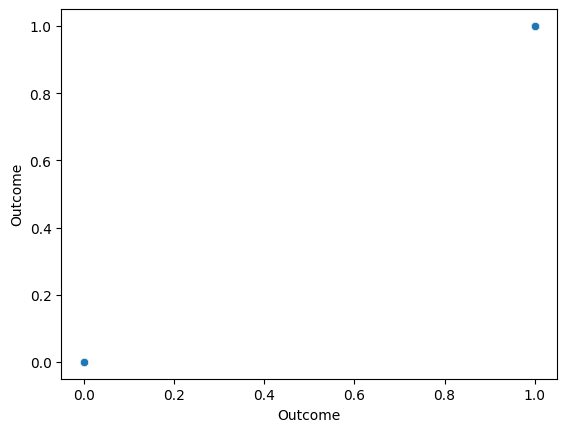

In [48]:
#scatterplot to understand the relationship between variables

#firstly identify the target variable "class" and filter out the remaining Independent columns

for col in diabetes.select_dtypes(include='number').columns:
    sns.scatterplot(data=diabetes, x=col, y='Outcome') #y='CLASS')
    plt.show()

<Axes: >

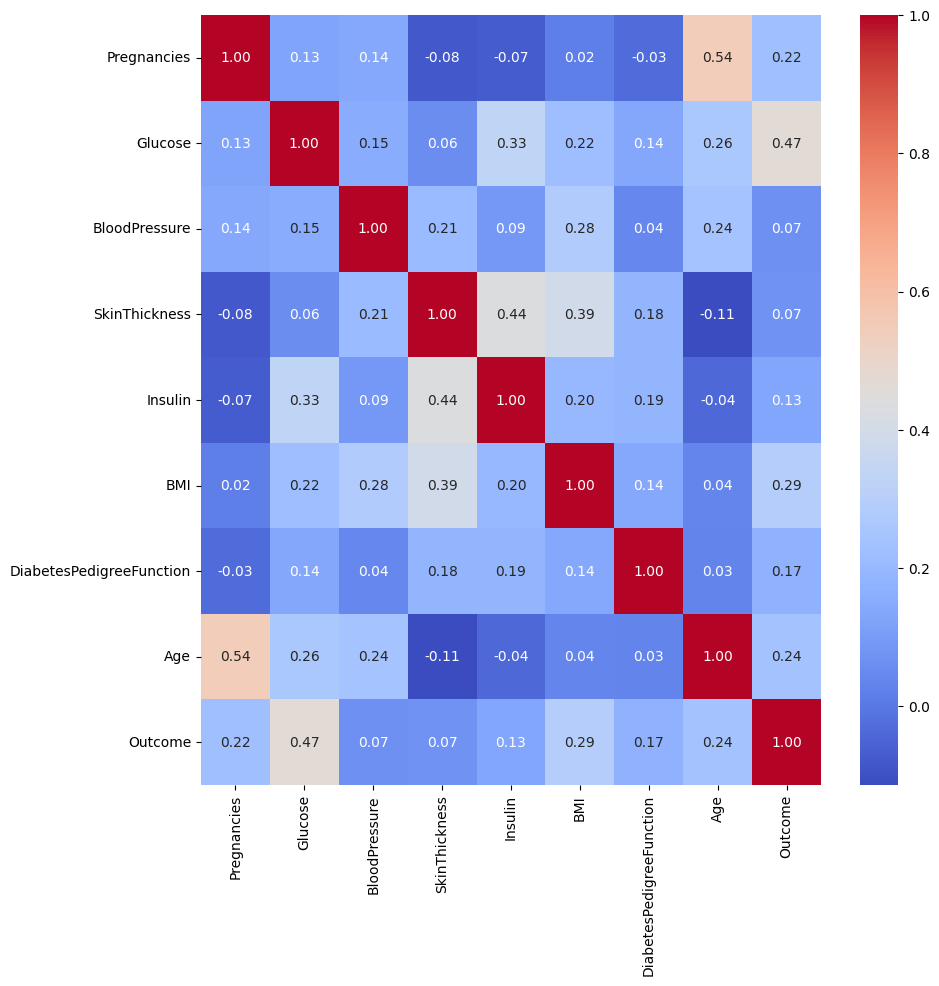

In [49]:
#establish  correlation with heatmap to interpret relation and multicolinearity
s= diabetes.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(s, annot=True, cmap='coolwarm', fmt=".2f")


<h3> step:5] - MISSING VALUES</h3>
<p>See if there are missing values - exclude target variable if it has missing values - CLASS </p>
<p>if the columns contains numerical continous values use the mean or median  </p>
<p>if the columns contains discrete values or categorical data select the mode </p>

In [55]:
#sum of total missing values for each predictor variables and target Class
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# fillna the numerical columns with mean() or median() -
# if m issing values present do the same for discrete categorical column with mode()
num_cols = ["AGE","Urea", "Cr", "HbA1c","Chol", "TG", "HDL", "LDL", "VLDL"]
for col in num_cols:
    diabetes[col].fillna( diabetes[col].median(), inplace= True)
   
#sum of total missing values after fillna().mean
diabetes.isnull().sum()

<h3> step:6] - OUTLIER TREATMENT</h3>  

In [56]:
# Only done for the continous variables NOT CATGERICAL OR DISCRETE VARIABLES

def wisker(col):
    q1,q3 =np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return np.clip(col,lw, uw)
      

# outliers are present in columsn with numerical continoius values mostly
for col in num_cols:
    diabetes[col] = wisker(diabetes[col])
        

# Numerical feature distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes[col], kde=True)
plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = diabetes[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<h3>step:7] - Duplicates & Garbage value treatments</h3>

In [63]:
diabetes.duplicated().sum()

#check for garbage values
for i in diabetes.select_dtypes(include='number').columns:
    print(diabetes[i].value_counts())
    print("******"*5)

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
******************************
99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64
******************************
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64
******************************
0     227
32     31
30     27
27     23
23     22


<h3>step:8]- Encoding of Categorical data</h3>

In [64]:
#One-hot encode the 'CLASS' column
genOneHot = pd.get_dummies(diabetes,columns= diabetes.select_dtypes(include='number').columns  )#columns =['CLASS'])
#Concatenate the new columns to the original dataframe
diabetes = pd.concat([diabetes, genOneHot], axis=1)


<h3> step: 9]- Feature Scaling : Normalisation /Standardisation </h3>


In [66]:


def trainTestSplit(diabetes):
    # diabetes.iloc[ start: end of index rows, start:end of columns]
    # X = diabetes.iloc[ : ,0:14]
    # y =  diabetes.iloc[ :,14]

    y= diabetes[ 'Outcome' ]#'CLASS']
    X = diabetes.drop(['Outcome'], axis=1 )#, 'Cr'], axis=1) #DROP 'Urea' or 'Cr' high corr coefficient 0.62
    
    #Traintest Split - split the dataset into X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=104)

    # Encoding
    labEn = LabelEncoder()
    y_train = labEn.fit_transform(y_train)
    y_test = labEn.transform(y_test)  
    
    #Standardisation if using Linear Regression, Logistic, SVM, Neural Networks, KNN
    scaler = StandardScaler()
    
    X_train = scaler.fit_transform(X_train)
    X_test =  scaler.fit_transform(X_test)

    return X_train, X_test, y_train, y_test


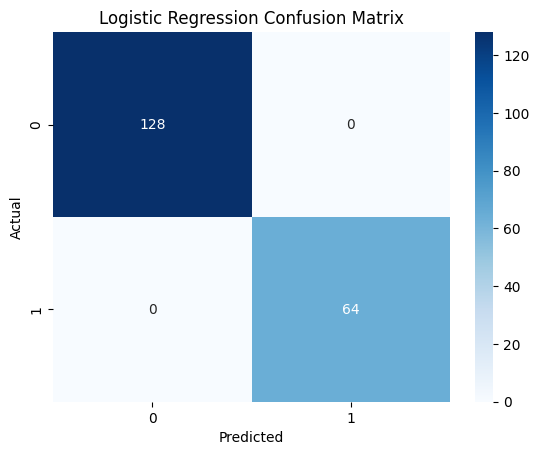

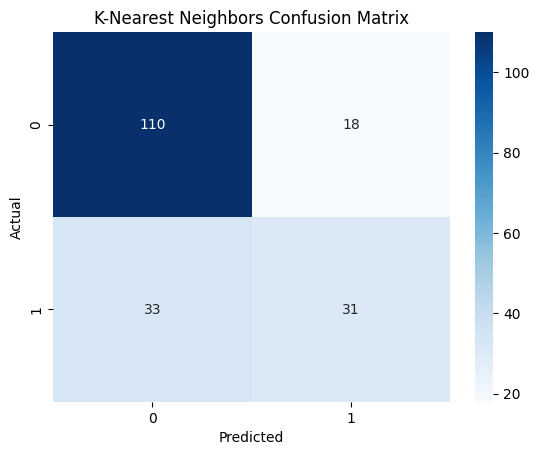

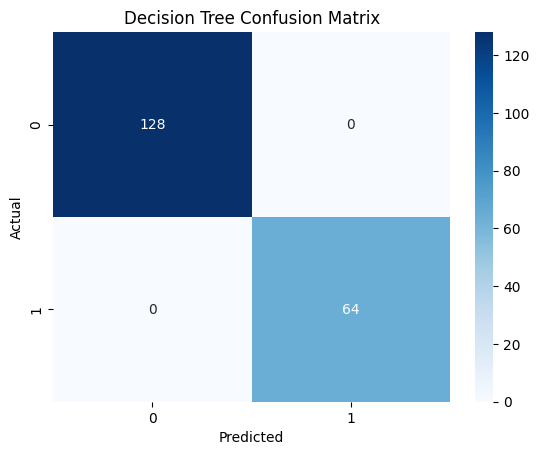

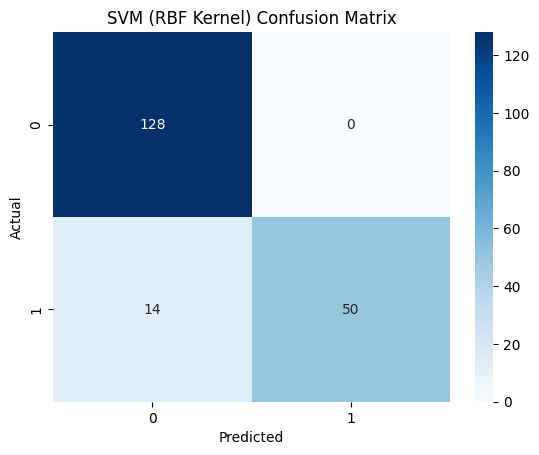

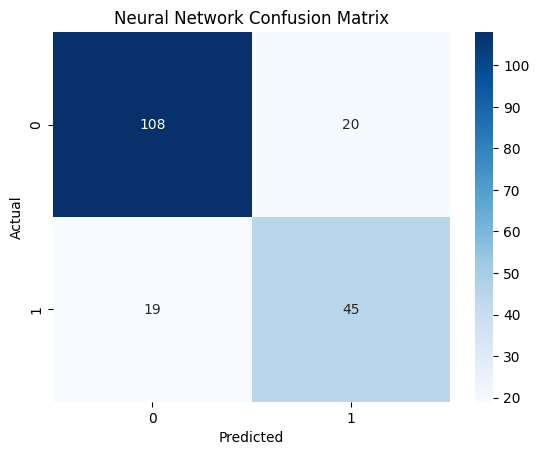

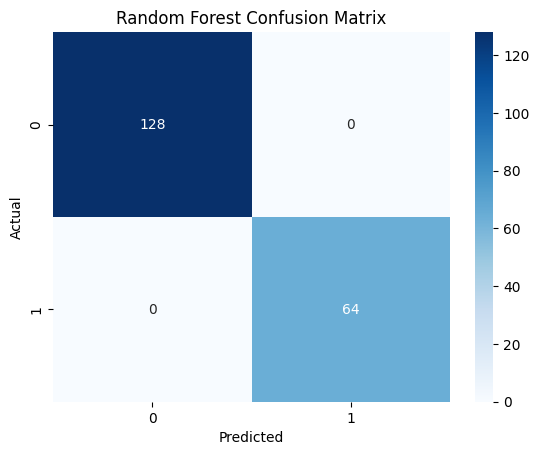

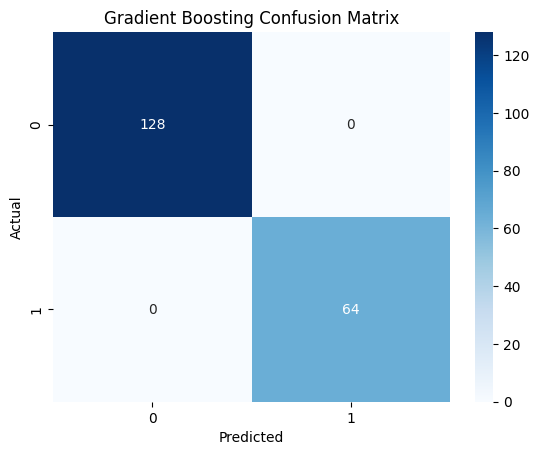


Model Performance Comparison:
                 Model  Accuracy  F1 Score
0  Logistic Regression  1.000000  1.000000
2        Decision Tree  1.000000  1.000000
5        Random Forest  1.000000  1.000000
6    Gradient Boosting  1.000000  1.000000
3     SVM (RBF Kernel)  0.927083  0.924496
4       Neural Network  0.796875  0.797264
1  K-Nearest Neighbors  0.734375  0.724096


In [67]:

#Training
X_train, X_test, y_train, y_test = trainTestSplit(diabetes)

tmodels = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM (RBF Kernel)': SVC(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

#fit
results = []
for name, model in tmodels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Updated averaging method
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

    
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Compare model performance
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\nModel Performance Comparison:")
print(results_df)

